In [2]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
nRowsRead = 1000 # specify 'None' if want to read whole file
# weather_data_kolkata_2015_2020.csv may have more rows in reality, but we are only loading/previewing the first 1000 rows
df1 = pd.read_csv('weather_data_kolkata_2015_2020.csv', delimiter=',', nrows = nRowsRead)
df1.dataframeName = 'weather_data_kolkata_2015_2020.csv'
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 1000 rows and 3 columns


In [4]:
df1.shape

(1000, 3)

In [5]:
df1.head(5)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


In [6]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = int((nCol + nGraphPerRow - 1) / nGraphPerRow)
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        print(nGraphRow, nGraphPerRow)
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

1 5


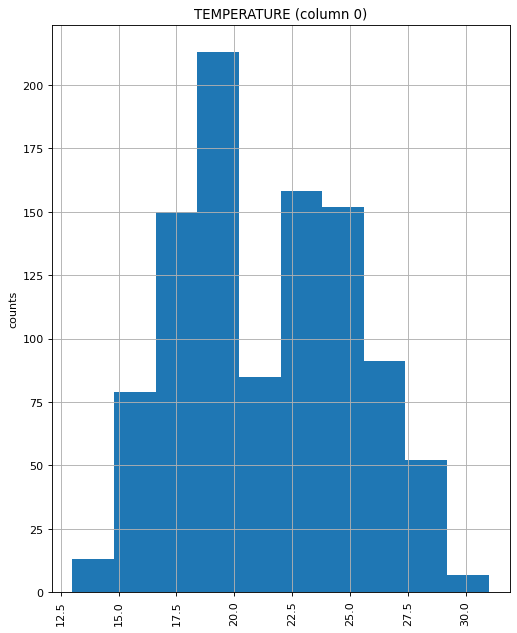

In [7]:
plotPerColumnDistribution(df1, 10, 5)

In [8]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix', fontsize=15)
    plt.show()

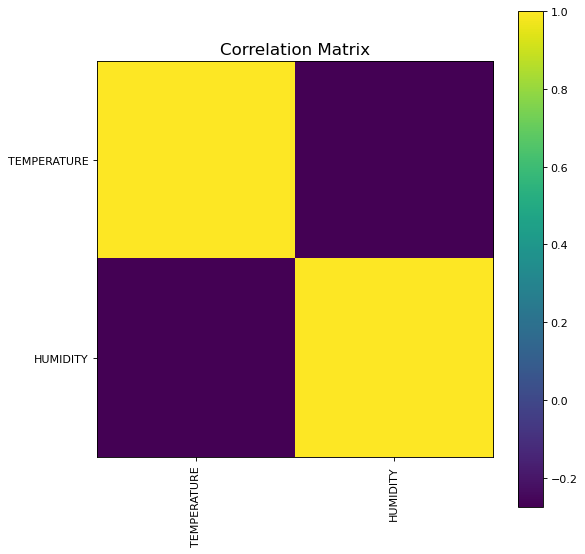

In [9]:
plotCorrelationMatrix(df1, 8)

In [10]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

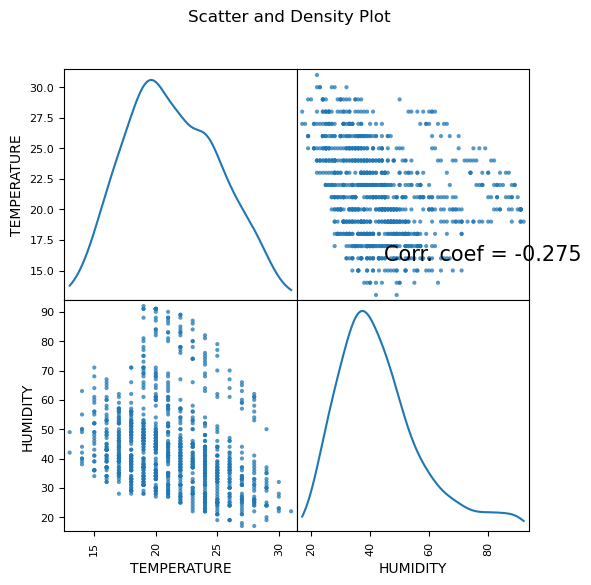

In [11]:
plotScatterMatrix(df1, 6, 15)

In [12]:
df1.head(5)

,DATETIME,TEMPERATURE,HUMIDITY
0,2015-01-01 00:00:00,19.0,75.0
1,2015-01-01 01:00:00,19.0,77.0
2,2015-01-01 02:00:00,19.0,78.0
3,2015-01-01 03:00:00,19.0,80.0
4,2015-01-01 04:00:00,19.0,81.0


ER

In [13]:
# convert datetime column for training
df1['DATETIME'] = pd.to_datetime(df1['DATETIME'])
df1['year'] = df1['DATETIME'].dt.year
df1['month'] = df1['DATETIME'].dt.month
df1['day'] = df1['DATETIME'].dt.day
df1['hour'] = df1['DATETIME'].dt.hour
df1['minute'] = df1['DATETIME'].dt.minute
df1['second'] = df1['DATETIME'].dt.second
df1.head(5)


,DATETIME,TEMPERATURE,HUMIDITY,year,month,day,hour,minute,second
0,2015-01-01 00:00:00,19.0,75.0,2015,1,1,0,0,0
1,2015-01-01 01:00:00,19.0,77.0,2015,1,1,1,0,0
2,2015-01-01 02:00:00,19.0,78.0,2015,1,1,2,0,0
3,2015-01-01 03:00:00,19.0,80.0,2015,1,1,3,0,0
4,2015-01-01 04:00:00,19.0,81.0,2015,1,1,4,0,0


In [14]:
# drop DATETIME
df1.drop(['DATETIME'], axis=1, inplace=True)

In [15]:
df1.head()

,TEMPERATURE,HUMIDITY,year,month,day,hour,minute,second
0,19.0,75.0,2015,1,1,0,0,0
1,19.0,77.0,2015,1,1,1,0,0
2,19.0,78.0,2015,1,1,2,0,0
3,19.0,80.0,2015,1,1,3,0,0
4,19.0,81.0,2015,1,1,4,0,0


In [16]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense,  Dropout, LSTM
from tensorflow.keras.models import Sequential

In [17]:
# training a time series model
#   1. split the data into train and test
#   2. scale the data
#   3. reshape the data
#   4. build the model
#   5. train the model

In [18]:
# dataset includes 5 years of data of temperature, humidity, year, month, day, hour, minute, second
# train a time series model to predict temperature

# split the data into train and test
#   1. split the data into train and test
#   2. scale the data
#   3. reshape the data
#   4. build the model
#   5. train the model

In [19]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import time
import tensorflow as tf

In [20]:
# split the data into train and test
X, y = df1.drop(['TEMPERATURE'], axis=1), df1['TEMPERATURE']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
# scale the data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
# reshape the data
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# reshape y data
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

In [23]:
X_train.shape

(800, 7, 1)

In [24]:
X_test.shape

(200, 7, 1)

In [27]:
X_test[0]

array([[0.16      ],
       [0.        ],
       [0.        ],
       [0.7       ],
       [0.73913043],
       [0.        ],
       [0.        ]])

In [28]:
# build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.1))
model.add(Dense(32))
model.add(Dense(1))

In [29]:
# model summary
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 7, 50)             10400     
_________________________________________________________________
dropout (Dropout)            (None, 7, 50)             0         
_________________________________________________________________
dense (Dense)                (None, 7, 32)             1632      
_________________________________________________________________
dense_1 (Dense)              (None, 7, 1)              33        
Total params: 12,065
Trainable params: 12,065
Non-trainable params: 0
_________________________________________________________________


In [30]:
start = time.time()

# decide epochs
epochs = 10

# early stopping
# callback = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10)

# optimizer
model.compile(optimizer = "rmsprop", loss = 'mean_squared_error')
history = model.fit(X_train, y_train, validation_data=(X_train, y_train), epochs=epochs, batch_size=32)

# save the model
model.save(f"lstm_model.hdf5")

# metrics for model
print("--- %s seconds ---" % (time.time() - start))
loss = model.evaluate(X_test, y_test, batch_size=32)
print("\nLoss: %.2f" % (loss))

Epoch 1/10
25/25 [==============================] - 6s 23ms/step - loss: 421.5324 - val_loss: 305.9012
Epoch 2/10
25/25 [==============================] - 0s 7ms/step - loss: 226.3411 - val_loss: 186.1476
Epoch 3/10
25/25 [==============================] - 0s 7ms/step - loss: 166.1638 - val_loss: 142.3276
Epoch 4/10
25/25 [==============================] - 0s 7ms/step - loss: 123.3727 - val_loss: 103.5004
Epoch 5/10
25/25 [==============================] - 0s 6ms/step - loss: 90.1731 - val_loss: 76.6749
Epoch 6/10
25/25 [==============================] - 0s 7ms/step - loss: 69.1298 - val_loss: 59.9027
Epoch 7/10
25/25 [==============================] - 0s 7ms/step - loss: 54.5296 - val_loss: 47.4907
Epoch 8/10
25/25 [==============================] - 0s 7ms/step - loss: 44.1733 - val_loss: 39.1952
Epoch 9/10
25/25 [==============================] - 0s 6ms/step - loss: 37.8515 - val_loss: 33.7955
Epoch 10/10
25/25 [==============================] - 0s 6ms/step - loss: 32.4781 - val_loss

In [32]:
model.predict(X_test[0].reshape(1,-1,1))

array([[[10.08229 ],
        [21.842505],
        [21.469763],
        [21.201529],
        [20.850405],
        [20.313185],
        [20.74032 ]]], dtype=float32)

X_test[0]

In [33]:
X_test[0]

array([[0.16      ],
       [0.        ],
       [0.        ],
       [0.7       ],
       [0.73913043],
       [0.        ],
       [0.        ]])

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'val_loss'])


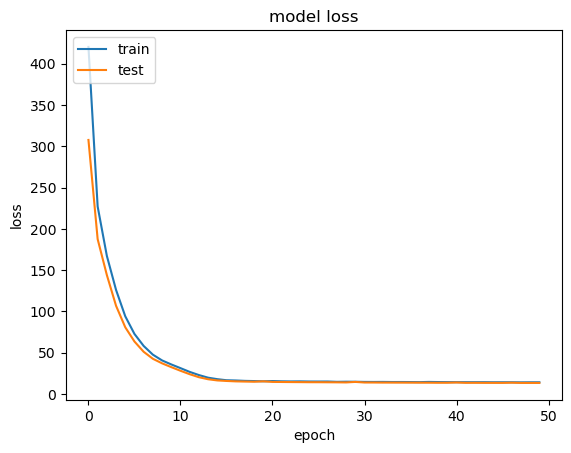

In [ ]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()